# High Tech Jobs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("high-tech-jobs.csv", parse_dates=["periode"])
df.head()

,ins,type_entite,entite,periode,valeur
0,3000,Région,Wallonie,2018-12-31,18.4
1,20002,Province,Brabant Wallon,2018-12-31,61.2
2,25000,Arrondissement,Nivelles,2018-12-31,61.2
3,25005,Commune,Beauvechain,2018-12-31,0.0
4,25014,Commune,Braine-l'Alleud,2018-12-31,64.8


In [3]:
df.shape

(288, 5)

In [4]:
df.dtypes

ins                     int64
type_entite            object
entite                 object
periode        datetime64[ns]
valeur                float64
dtype: object

### Numerical Data

In [5]:
df.describe(percentiles=[.10, .25, .75, .90])

,ins,valeur
count,288.000000,284.000000
mean,64158.173611,4.825352
std,19347.079901,14.930631
min,3000.000000,0.000000
10%,25123.700000,0.000000
25%,55027.250000,0.000000
50%,62099.500000,0.000000
75%,83028.750000,0.025000
90%,91115.800000,11.480000
max,93090.000000,93.100000


The `ins` column may be some kind of zip-like code

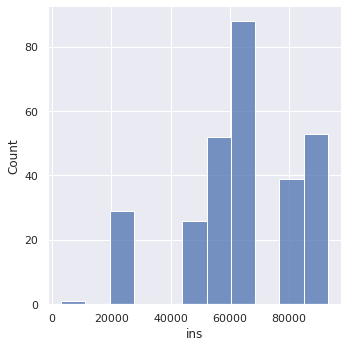

In [6]:
# 'ins' distribution
sns.set_theme()
sns.displot(df, x="ins");

Most of the values in the `valeur` column are centered around zero.

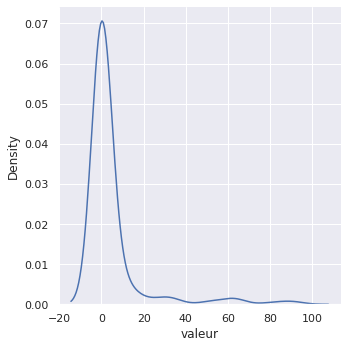

In [7]:
sns.displot(df, x="valeur", kind="kde");

In [8]:
df['type_entite'].value_counts()

Commune           262
Arrondissement     20
Province            5
Région              1
Name: type_entite, dtype: int64

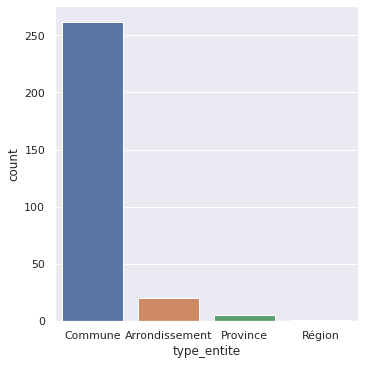

In [9]:
sns.catplot(x="type_entite", 
            kind="count",
            data=df, 
            order=["Commune", "Arrondissement", 
                   "Province", "Région"
            ]);

In [10]:
top30 = df["entite"].value_counts()[:30]
top30 = {"Location": top30.index, "Count": top30.values}
top30 = pd.DataFrame(data=top30)
top30

,Location,Count
0,Namur,3
1,Liège,3
2,Ath,2
3,Marche-en-Famenne,2
4,La Louvière,2
5,Soignies,2
6,Thuin,2
7,Huy,2
8,Neufchâteau,2
9,Virton,2


In [11]:
totals = df.groupby("entite").sum()
top10 = totals.sort_values(by="valeur", ascending=False)[:10]

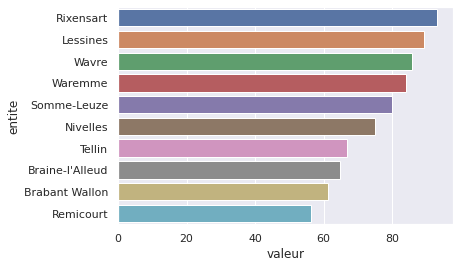

In [12]:
sns.barplot(data=top10, y=top10.index, x="valeur");